<a href="https://colab.research.google.com/github/dhivyasreedhar/Covid19CoughDetection/blob/main/Covid19CoughDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, UpSampling2D, Input
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l1
from keras.utils.vis_utils import plot_model
from datetime import datetime
from sklearn import metrics
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
plt.switch_backend('agg')
import itertools
import scipy as sp
from scipy import signal
import xgboost as xgb
import joblib
from glob import glob
import urllib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [3]:
#Loading CSV file
train_csv = pd.read_csv("/content/drive/MyDrive/Cough Recordings/cough_trial_extended.csv")

train_csv

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid
...,...,...
165,-bZrDCS8KAg_ 70.000_ 80.000.wav,not_covid
166,-ej81N6Aqo4_ 0.000_ 8.000.wav,not_covid
167,-gvLnl1smfs_ 90.000_ 100.000.wav,not_covid
168,-hu5q-Nn4BM_ 70.000_ 80.000.wav,not_covid


In [4]:
train_csv['class'].unique()

array(['not_covid', 'covid'], dtype=object)

In [6]:
cmap = plt.get_cmap('inferno')
tot_rows = train_csv.shape[0]
for i in range(tot_rows):
    source = train_csv['file_properties'][i]
    filename = '/content/drive/MyDrive/Cough Recordings/trial_covid/'+source
    y,sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'./{source[:-3].replace(".", "")}.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [7]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [17]:
file = open('/content/drive/MyDrive/Cough Recordings/data_new_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
        source = train_csv['file_properties'][i]
        file_name = '/content/drive/MyDrive/Cough Recordings/trial_covid/'+source
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{source[:-3].replace(".", "")} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
      
        file = open('/content/data_new_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [22]:
data=pd.read_csv('/content/data_new_extended.csv')

ParserError: ignored

In [23]:
data.shape

(170, 28)

In [24]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [25]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [28]:
X_train.shape

(113, 26)

In [29]:
y_train.shape

(113,)

Building Neural Network

Saved model to disk


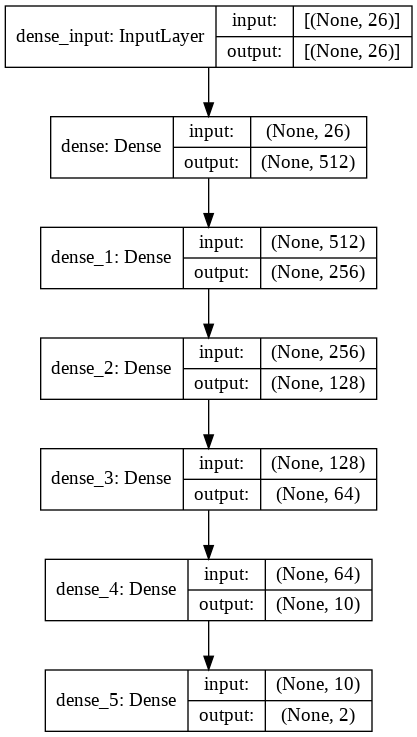

In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# plot model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 186,976
Trainable params: 186,976
Non-trainable params: 0
__________________________________________________

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)     

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 0.7489 - accuracy: 0.1150
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6516 - accuracy: 0.8584
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5872 - accuracy: 0.8938
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5264 - accuracy: 0.8938
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4623 - accuracy: 0.8938
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3980 - accuracy: 0.8938
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3415 - accuracy: 0.8938
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2985 - accuracy: 0.8938
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2723 - accuracy: 0.8938
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2578 - accuracy: 0.8938
Epoch 11/100
1/1 [==

In [33]:
test_loss, test_acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 8ms/step - loss: 0.1481 - accuracy: 0.9649


Test Accuracy

In [34]:
print('test_acc: ',test_acc)

test_acc:  0.9649122953414917


Predictions on Test Data

In [35]:
predictions = model.predict(X_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(predictions[:4])
print(y_test[:4])

(2,)
1.0
[[6.0851906e-16 1.0000000e+00]
 [6.8534923e-16 1.0000000e+00]
 [1.3496669e-08 1.0000000e+00]
 [1.0949216e-08 1.0000000e+00]]
[1 1 1 1]
